In [1]:
!pip install amsmath

ERROR: Could not find a version that satisfies the requirement amsmath (from versions: none)
ERROR: No matching distribution found for amsmath


### Problem formulation

You are given data of the form (x_i, y_i), where x_i is the number of hours the student i has spent to study for the exam and y_i the result of the exam. If y_i = 0, the i_th student has failed, otherwise he passed the exam.

From the data, you are asked to develop a model that can predict whether a student pass the exam, knowing the number of hours he used for studying

### Dumb Hypothesis

$f(x) = \sigma(x - a)$ where $f(x) \in [0, 1]$ is the probability of a student passing the exam if he/she studied for x hours.

$\sigma(x)$ is the sigmoid activation function where $\sigma(x) = \frac{1}{1 + e ^ {-x}}$

### Why did I come up with that hypothesis?

- Of course we know it would be insufficient to predict exactly whether the student pass the exam or not, when the only information we got is the number of hours used for learning. There would be several other factors. So we just accept that we can never be correct?
- No, actually. We can still have some information with the number of hours. We clearly can observe a trend: The more hours we study, the more likely we pass the exam.
- Given the uncertainty of data, the lack of factors in data, predicting discretely of value 0 and 1 is pretty stupid. It is useless. What is more valuable is how likely (probability) that the student pass the exam.
- So now, our hypothesis is a function that returns a probability
- To think about it, we have to guess the underlying distribution of the population, given a sample of data.
- That's the high level for now. Then, why don't we just use the probability found in the sample as the distribution for population?
- That's a good point to revisit later.
- For this task, we naturally feel that there is a threshold that decides whether the student pass or not. The further the student get from the threshold, the more extreme likely the result would happen. What am I even saying haha. It's very similar to the graph of sigmoid function

![Sigmoid's Curve](./media/Logistic-curve.svg)

### Loss function

With the stupid hypothesis, let's define a loss function. The loss function can also be stupid. But it's good to do this so as we can feel the difference after seeing the running process.

How about we go with the normal squared error?
$$
    L(a) = \sum_{i = 1}^n (y_i - \sigma(x - a)) ^ 2
$$

Okay now let's go and find the derivative of the loss function

$$
\frac{dL}{da} = \sum_{i = 1}^n \frac{d(y_i - \sigma(x - a))^2}{da}
= \sum_{i = 1} ^ n 2(y_i - \sigma(x - a)) \frac{d(y_i - \sigma(x - a))}{da}\\
= \sum_{i = 1} ^ n 2(y_i - \sigma(x - a)) \frac{d(- \sigma(x - a))}{d(x - a)} \frac{d(x - a)}{da}
= \sum_{i = 1} ^ n 2(y_i - \sigma(x - a)) \sigma(x - a) (1 - \sigma(x - a))
$$

### Dataset

In [3]:
import numpy as np

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

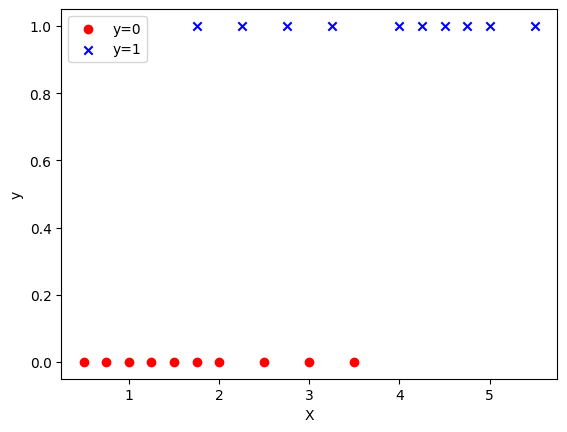

In [5]:
#Plot the data, points where y values = 0 has red color and y values = 1 has blue color
import matplotlib.pyplot as plt
plt.scatter(X[0,y==0], y[y==0], color='red', marker='o', label='y=0')
plt.scatter(X[0,y==1], y[y==1], color='blue', marker='x', label='y=1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()


### Loss function implementation

In [10]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def loss(a):
    """ 
        Loss function for variable a, which is the threshold.
    """
    loss_sum = 0
    for idx in range(len(X[0])):
        hours = X[0][idx]
        prediction = sigmoid(hours - a)
        truth = y[idx]
        loss_sum += (prediction - truth)**2
    return loss_sum

def loss_derivative(a):
    """ 
        Derivative of loss function for variable a, which is the threshold.
    """
    loss_derivative_sum = 0
    for idx in range(len(X[0])):
        hours = X[0][idx]
        prediction = sigmoid(hours - a)
        truth = y[idx]
        loss_derivative_sum -= 2 * (truth - prediction) * sigmoid(hours - a) * (1 - sigmoid(hours - a))
    return loss_derivative_sum


### Gradient descent

In [23]:
import os
import imageio

def clear_graph_folder():
    folder = './graphs'
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        os.remove(file_path)

def create_gifs():
    # Combine all images in graphs folder into a gif
    images = []
    for i in range(len(os.listdir('./graphs'))):
        file_path = os.path.join('./graphs', str(i) + '.png')
        images.append(imageio.imread(file_path))
    imageio.mimsave('./animation.gif', images, duration=0.5)


2.728165423924947


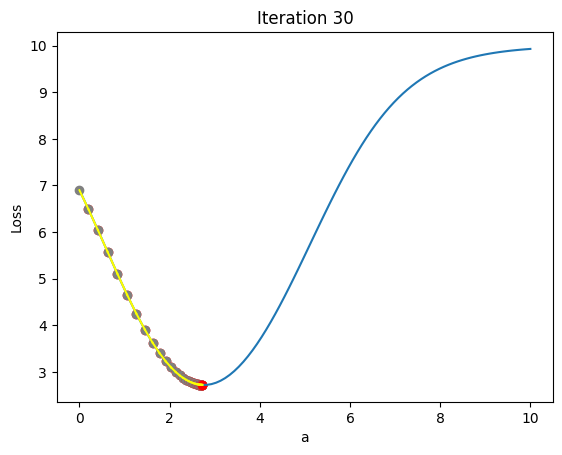

In [19]:
x = np.linspace(0, 10, 100)

def gradient_descent_process(start_a, x, learning_rate, iterations):
    """ 
        Gradient descent process for variable a, which is the threshold.
    """
    clear_graph_folder()
    a = start_a
    i = 0
    y = loss(x)
    plt.plot(x, y)
    while (True):
        gradient = loss_derivative(a)
        new_a = a + learning_rate * gradient
        plt.plot([a, new_a], [loss(a), loss(new_a)], color='yellow')
        #Draw the old point as gray and the new point as red
        plt.scatter(a, loss(a), color='gray', marker='o')
        plt.scatter(new_a, loss(new_a), color='red', marker='o')
        plt.title('Iteration %s' % i)
        plt.xlabel('a')
        plt.ylabel('Loss')
        plt.savefig('./graphs/%s.png' % i)
        a = new_a
        if (gradient < 0.0001):
            break
        i += 1
        if (i > iterations):
            break
    return a

a_optimal = gradient_descent_process(0, x, 0.1, 30)
print(a_optimal)

In [24]:
create_gifs()

31


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14244\2370886589.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


In [25]:
# Show the gif
from IPython.display import Image
Image(url='./animation.gif')
